In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P2\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
852,2020-07-02,United Kingdom,313876.0,313483.0,43820.0,43906.0,393.0,-86.0
853,2020-07-02,Germany,195281.0,194725.0,9005.0,8985.0,556.0,20.0
854,2020-07-02,Iran,230757.0,230211.0,10963.0,10958.0,546.0,5.0
855,2020-07-02,Turkey,201180.0,201098.0,5148.0,5150.0,82.0,-2.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  2601.4597432905484
RMSE =  6227.7342783343165


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  316.84247374562426
RMSE =  725.9625325041001


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAPE =  13306.309523809523
RMSE =  16753.98090859943
-- World performances for deaths --
MAPE =  1600.9642857142858
RMSE =  1949.9869627158805


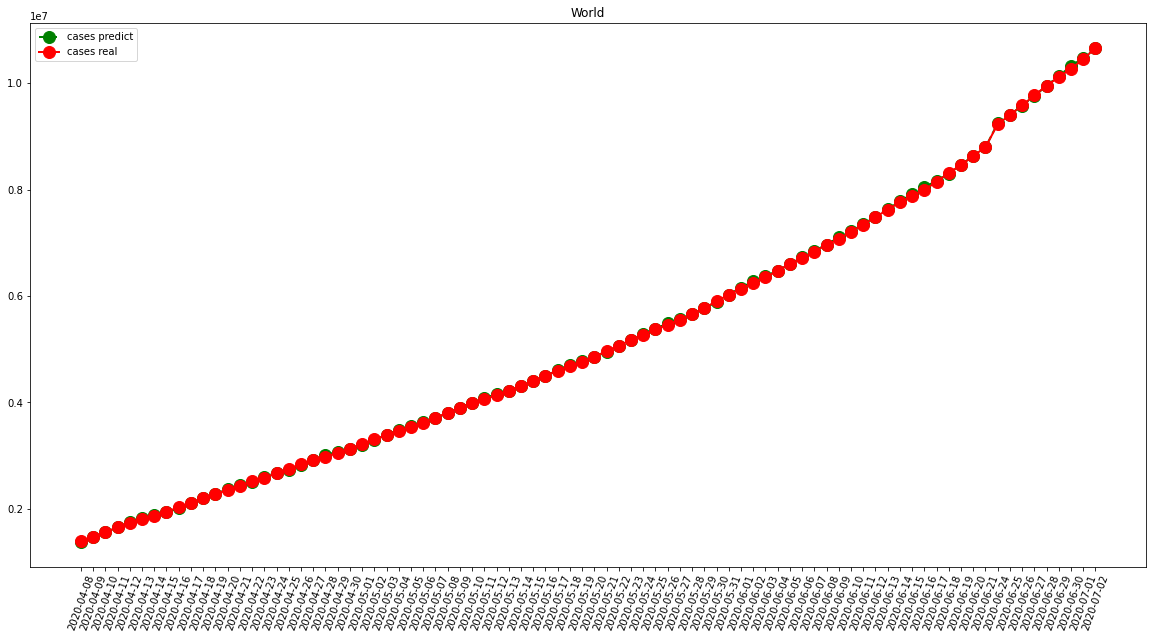

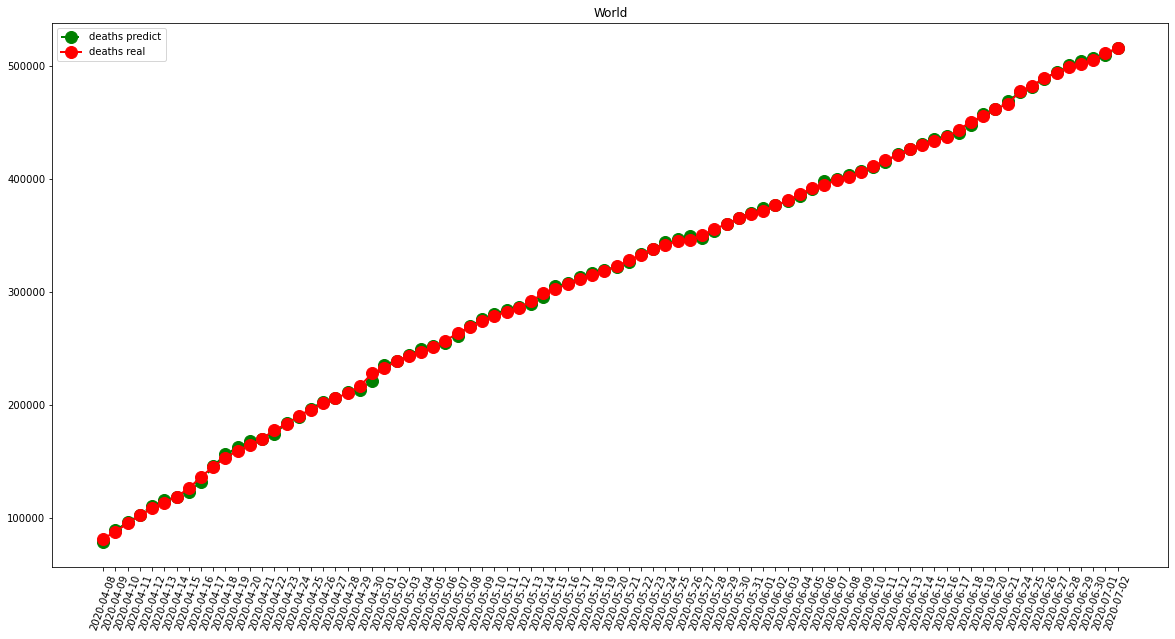

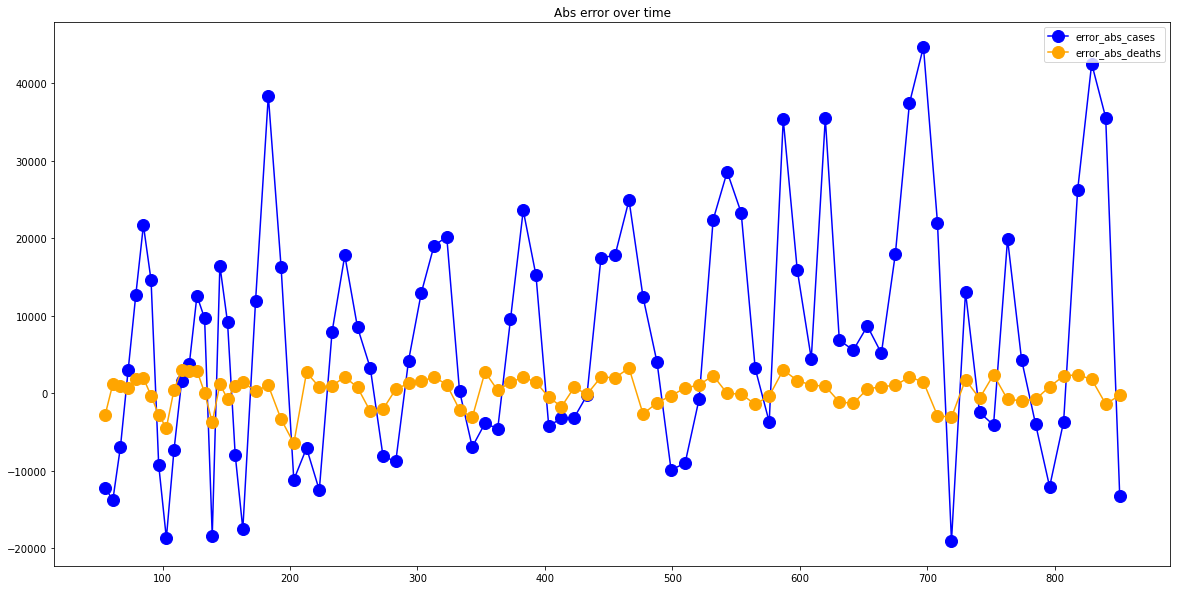

In [7]:
visShow("World")

-- France performances for cases --
MAPE =  899.531914893617
RMSE =  1485.1746082603474
-- France performances for deaths --
MAPE =  186.95744680851064
RMSE =  345.45468034202804


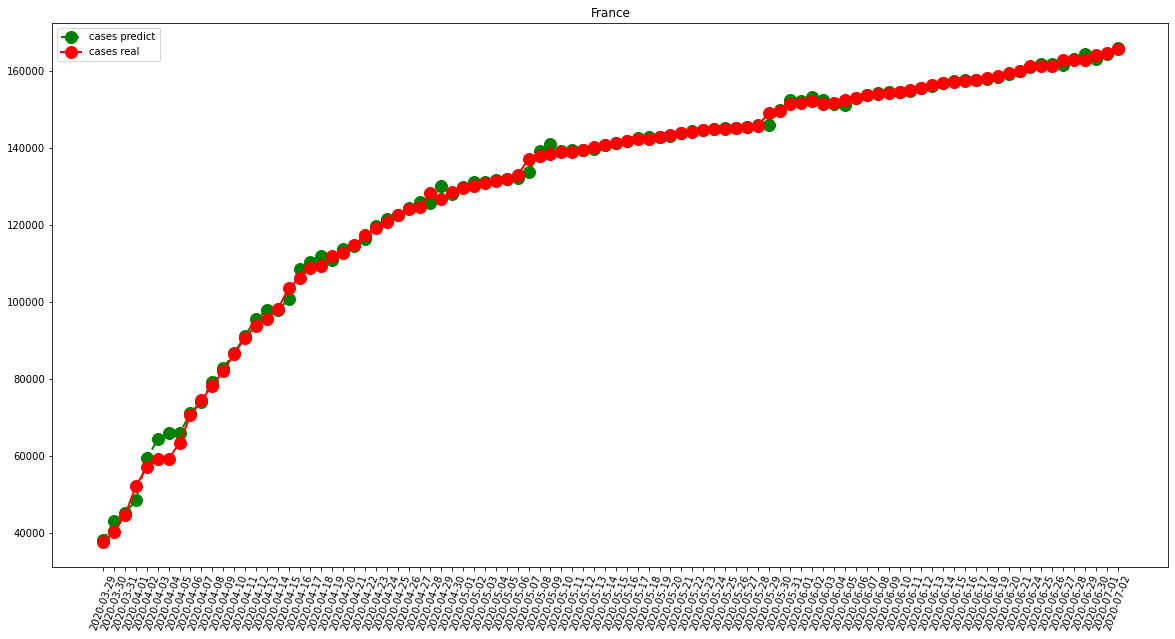

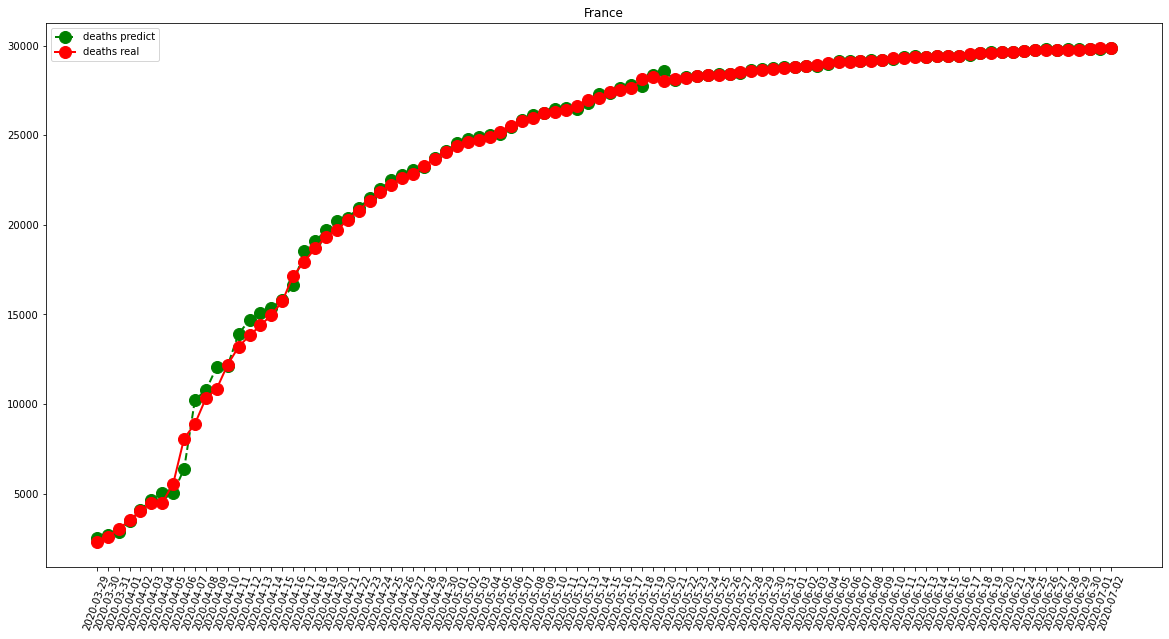

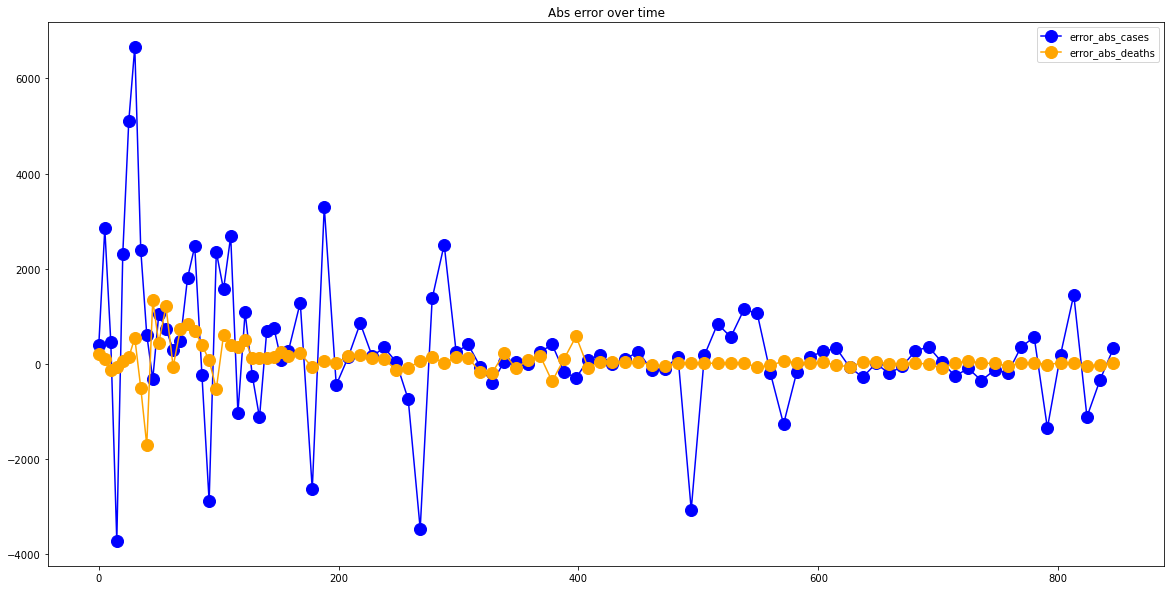

In [8]:
visShow("France")

-- Italy performances for cases --
MAPE =  387.82978723404256
RMSE =  558.5142143755828
-- Italy performances for deaths --
MAPE =  102.07446808510639
RMSE =  304.94218147470707


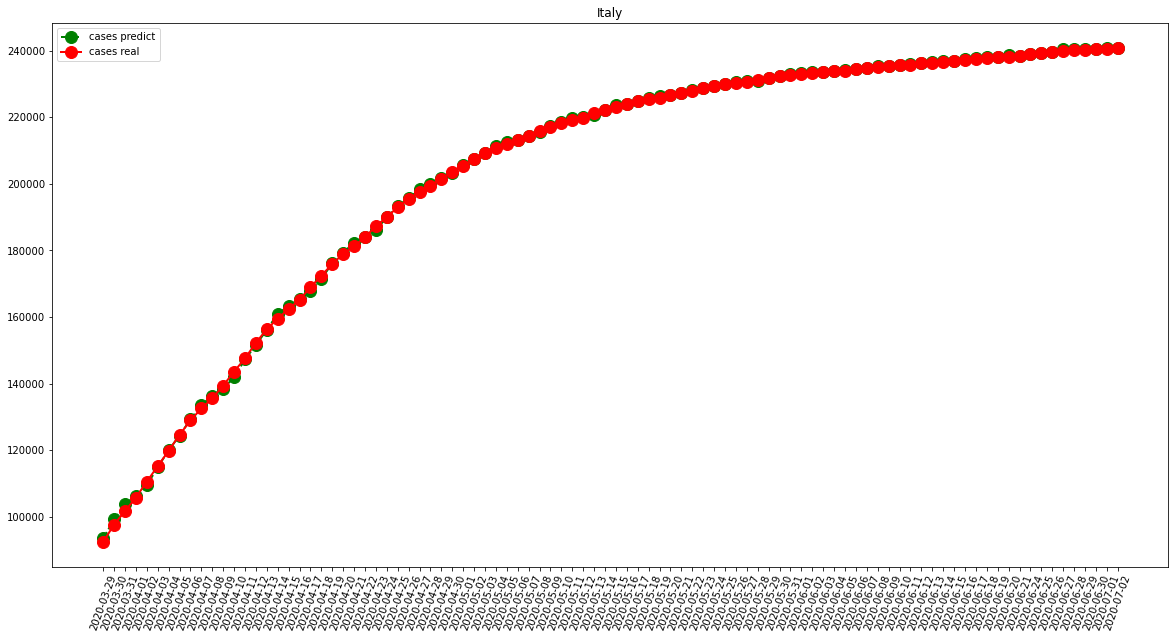

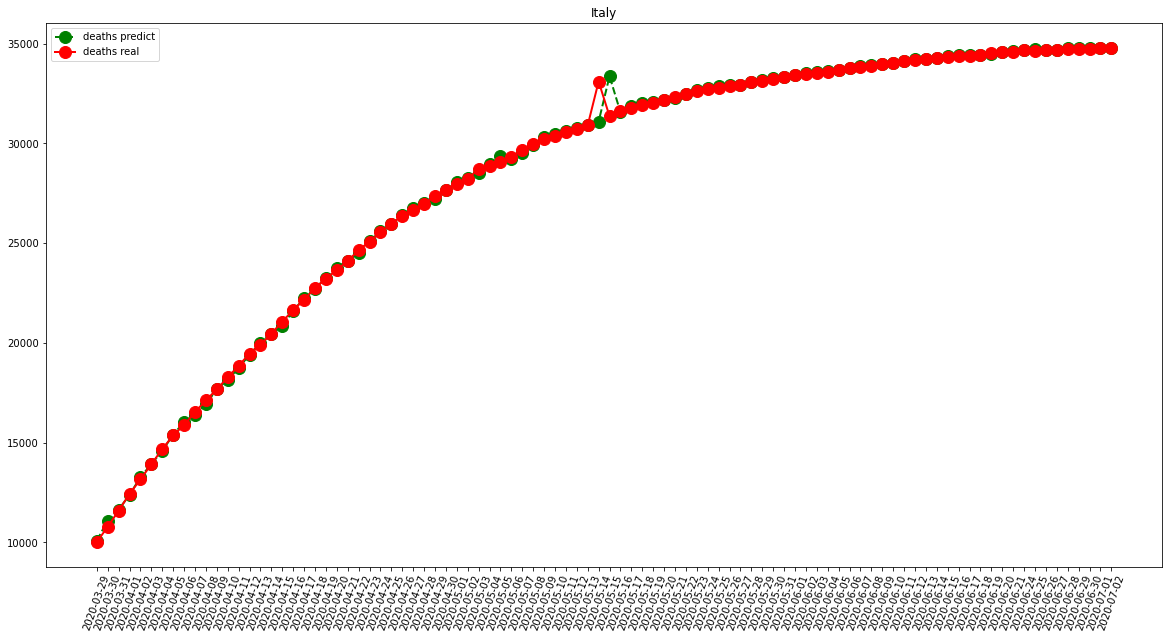

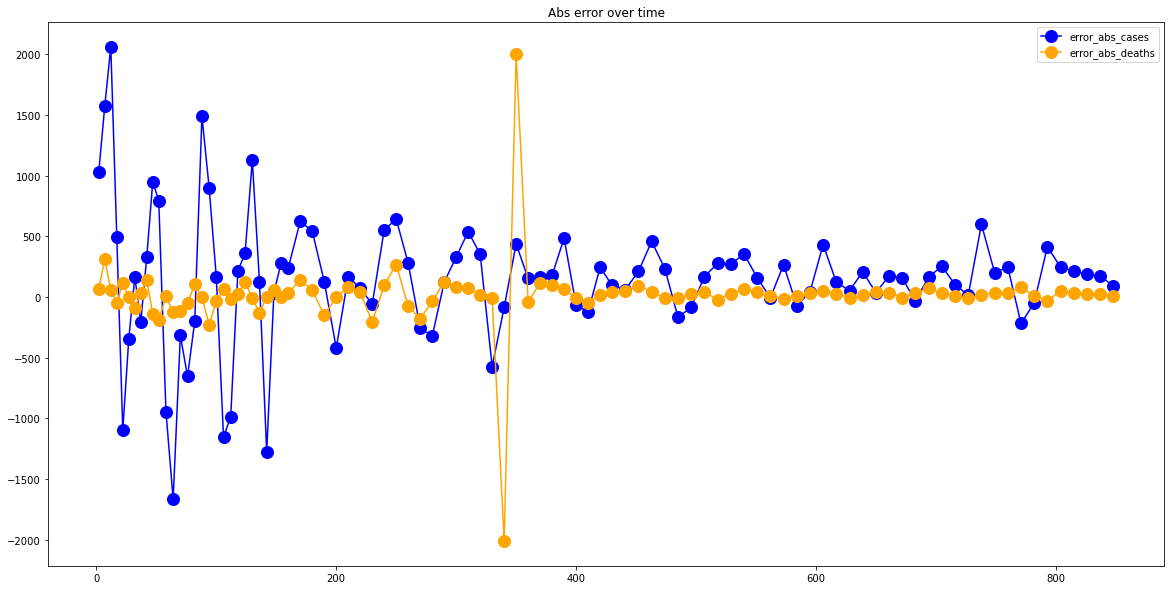

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAPE =  881.0531914893617
RMSE =  2108.0331384411293
-- Spain performances for deaths --
MAPE =  192.01063829787233
RMSE =  418.6149274056152


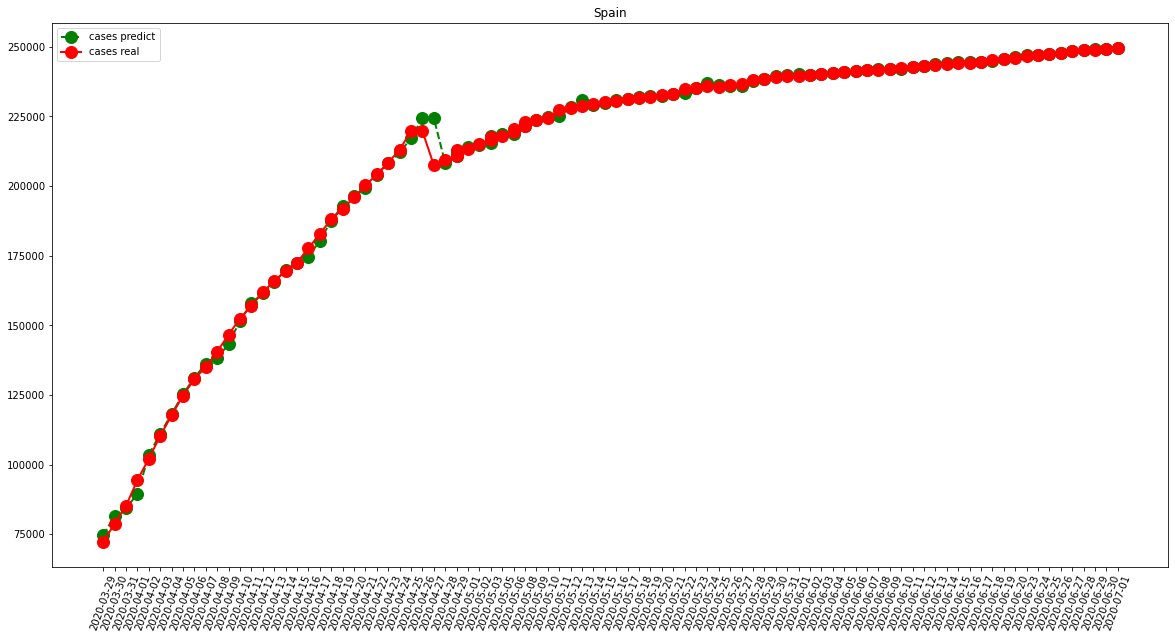

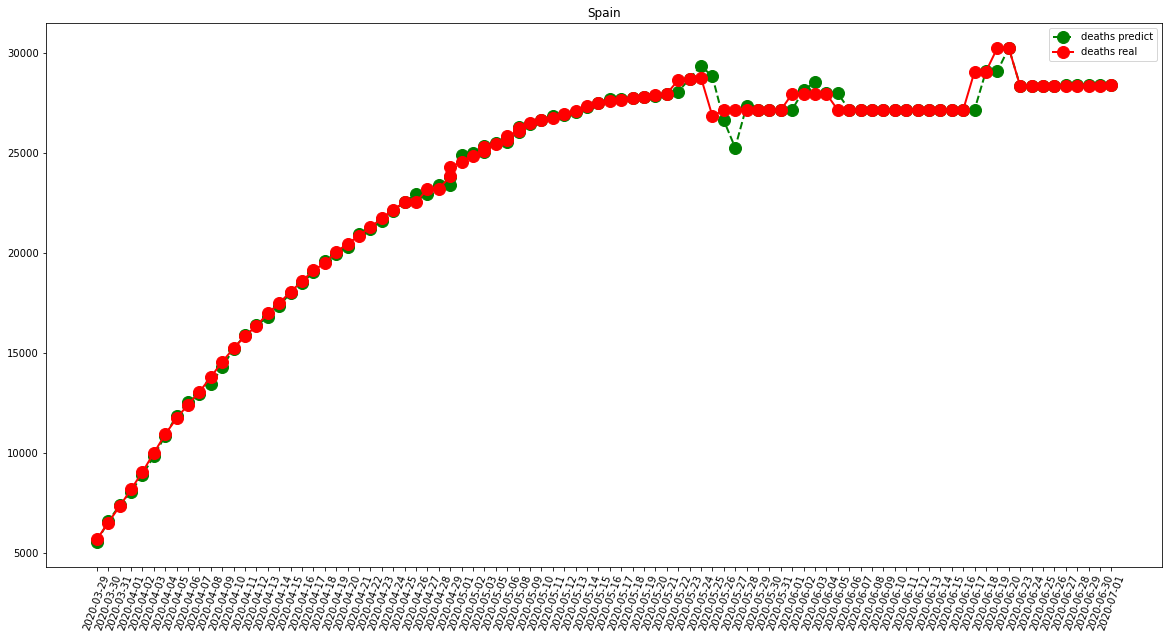

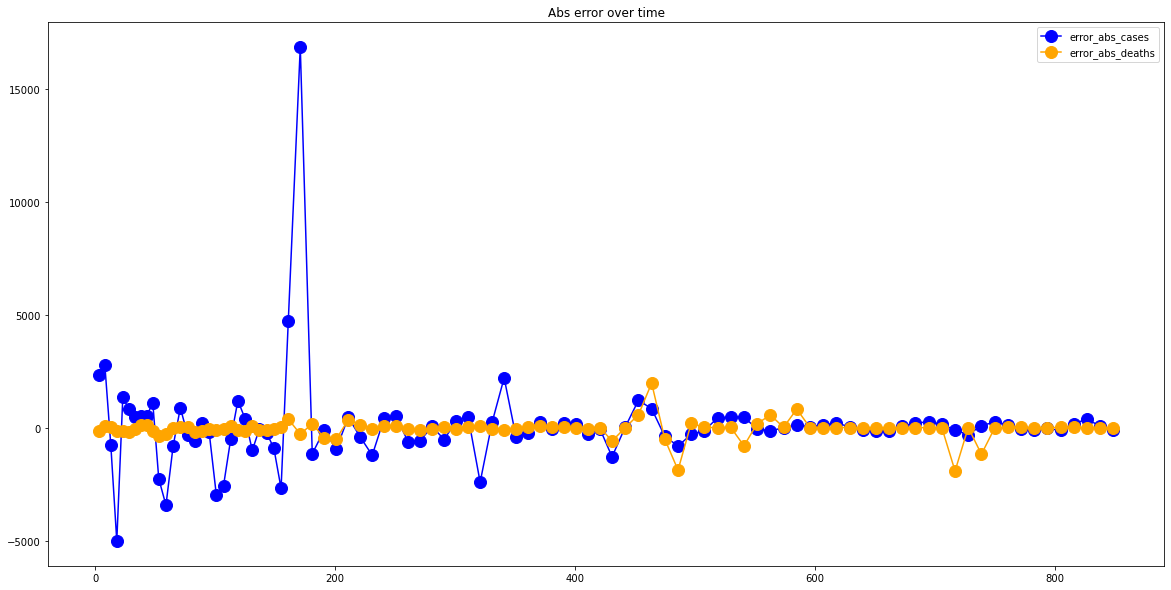

In [10]:
visShow("Spain")

-- United States performances for cases --
MAPE =  4760.063829787234
RMSE =  6547.229678885957
-- United States performances for deaths --
MAPE =  543.4468085106383
RMSE =  796.4724755164607


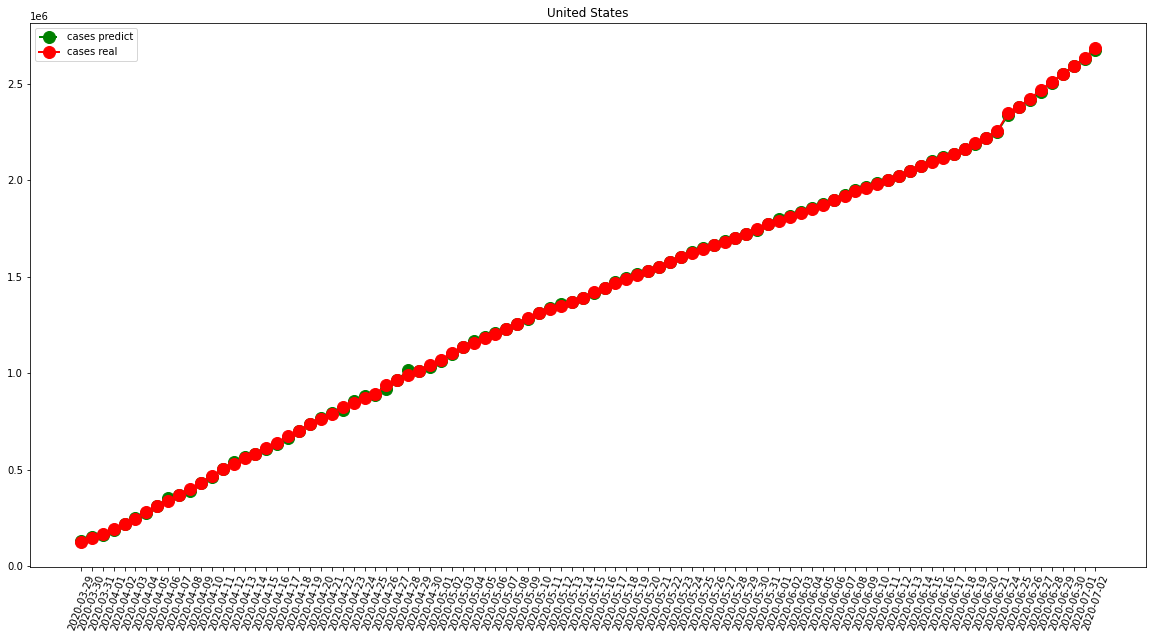

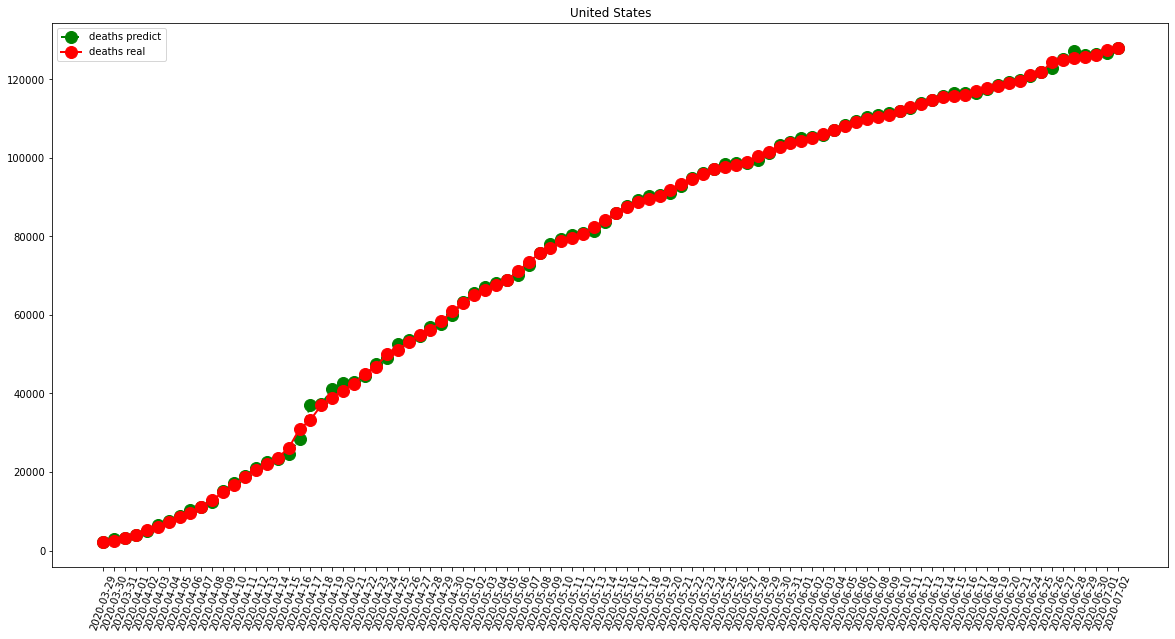

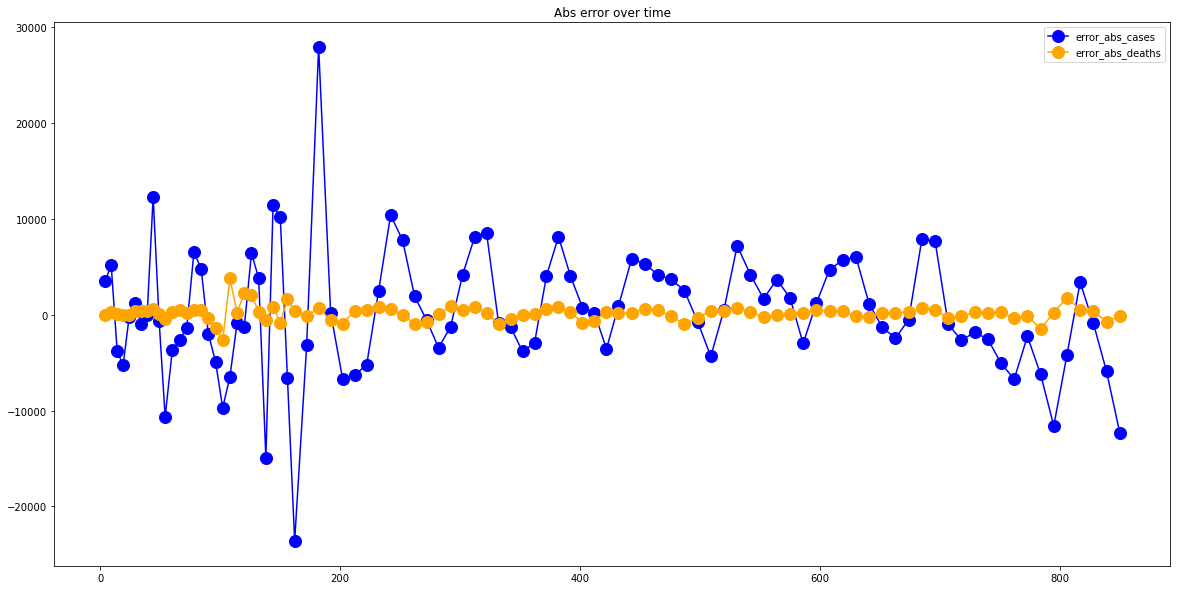

In [11]:
visShow("United States")

-- China performances for cases --
MAPE =  92.58510638297872
RMSE =  121.2149049889879
-- China performances for deaths --
MAPE =  40.255319148936174
RMSE =  161.86374622016362


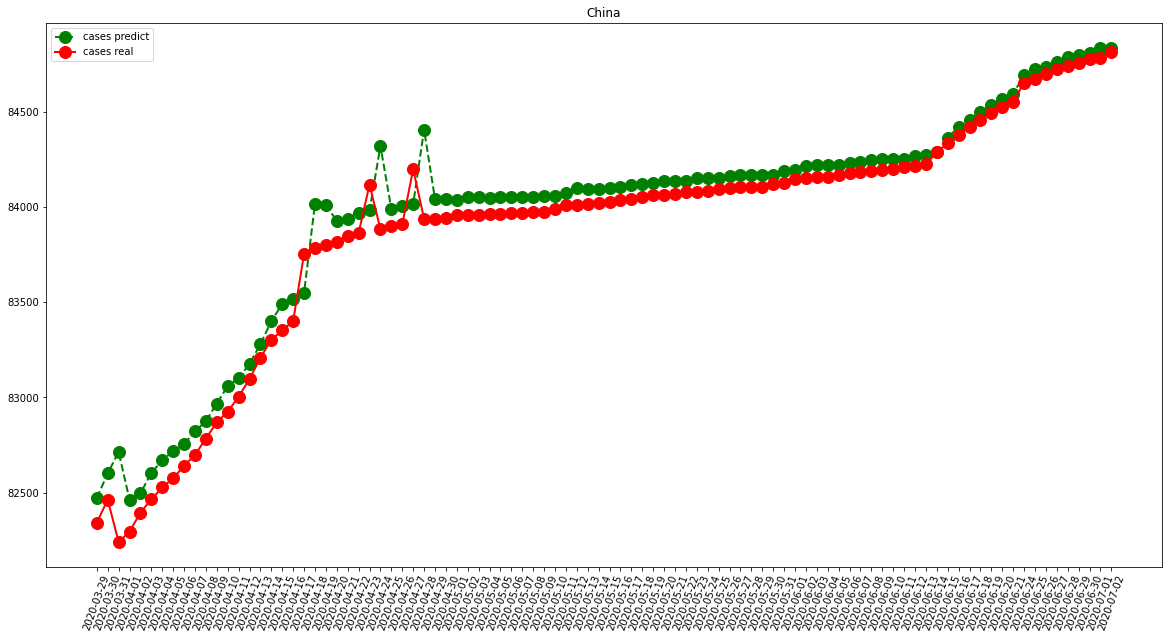

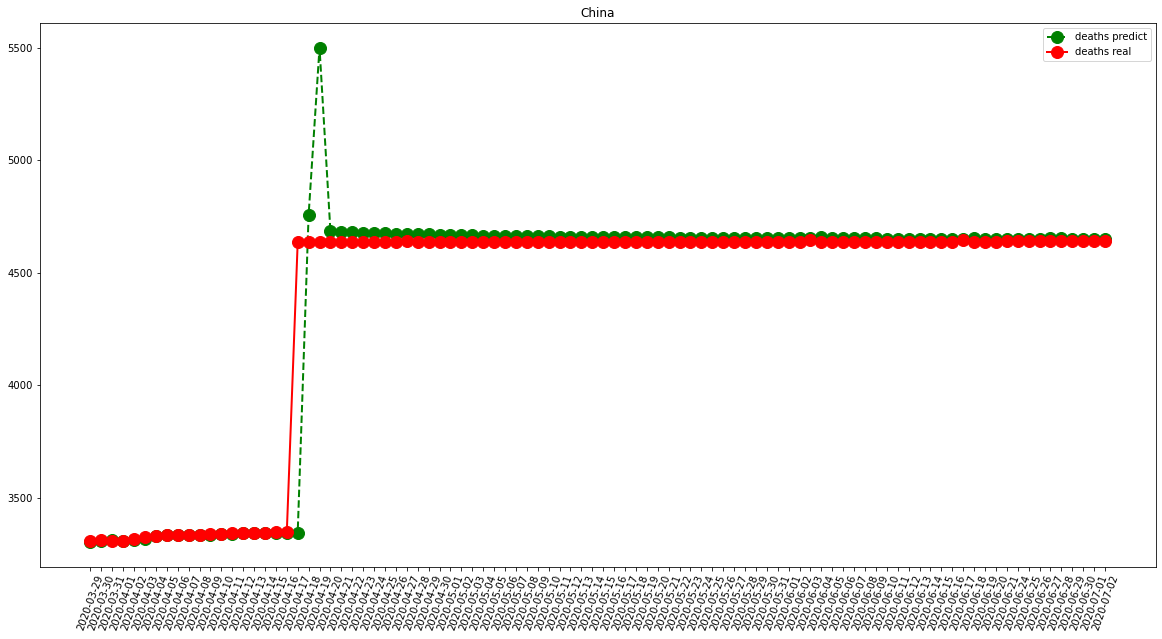

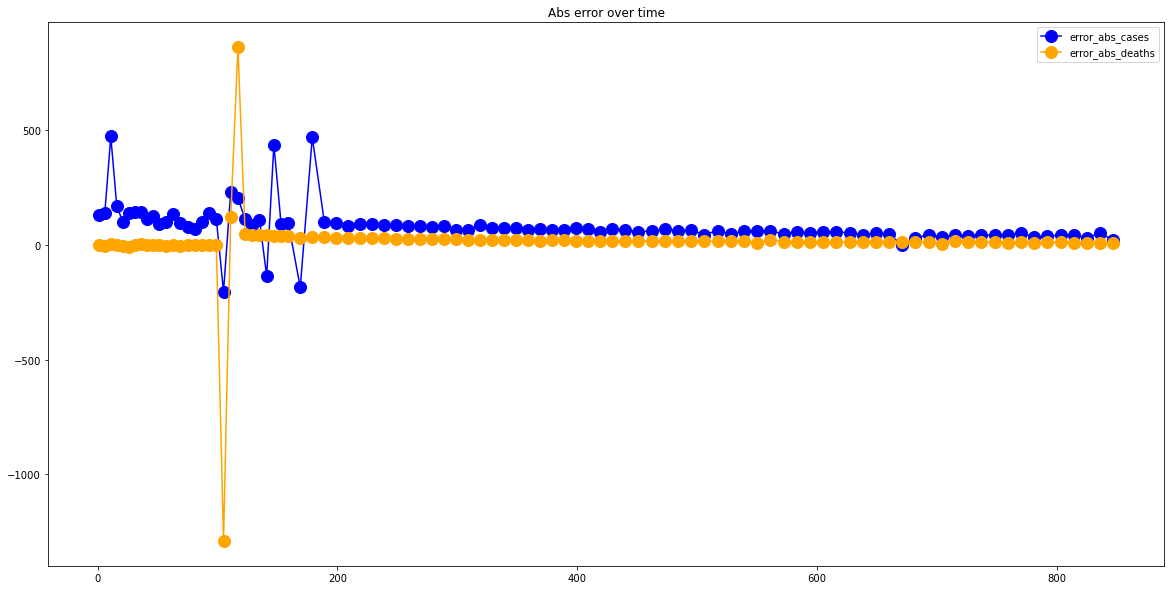

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAPE =  837.3636363636364
RMSE =  1162.9540755413268
-- United Kingdom performances for deaths --
MAPE =  256.8787878787879
RMSE =  601.2132430646914


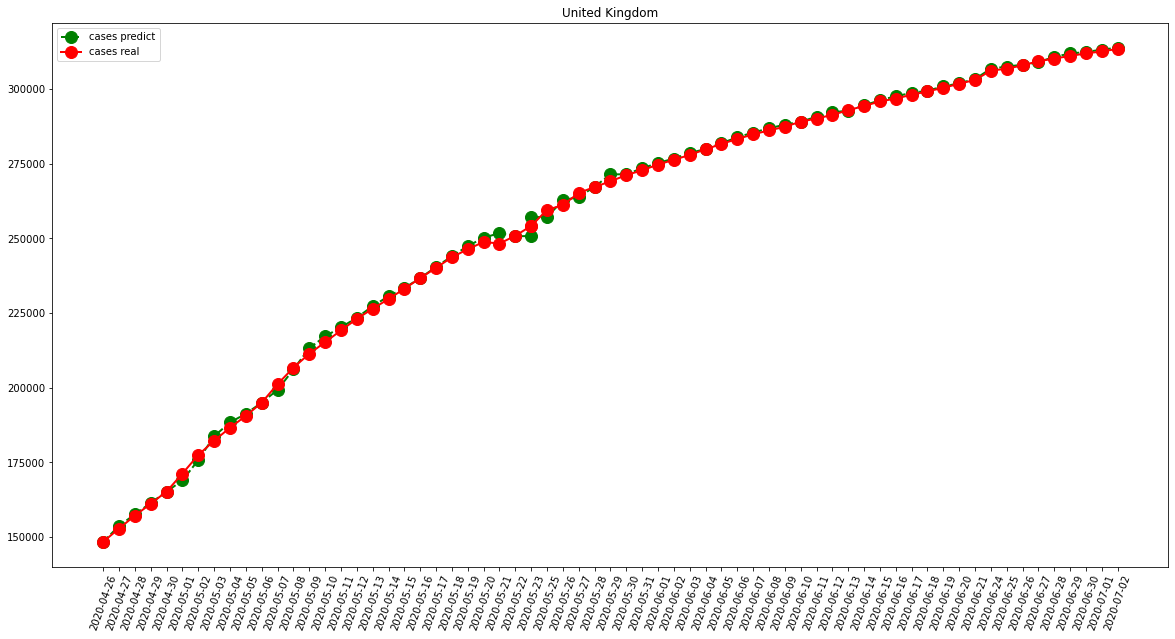

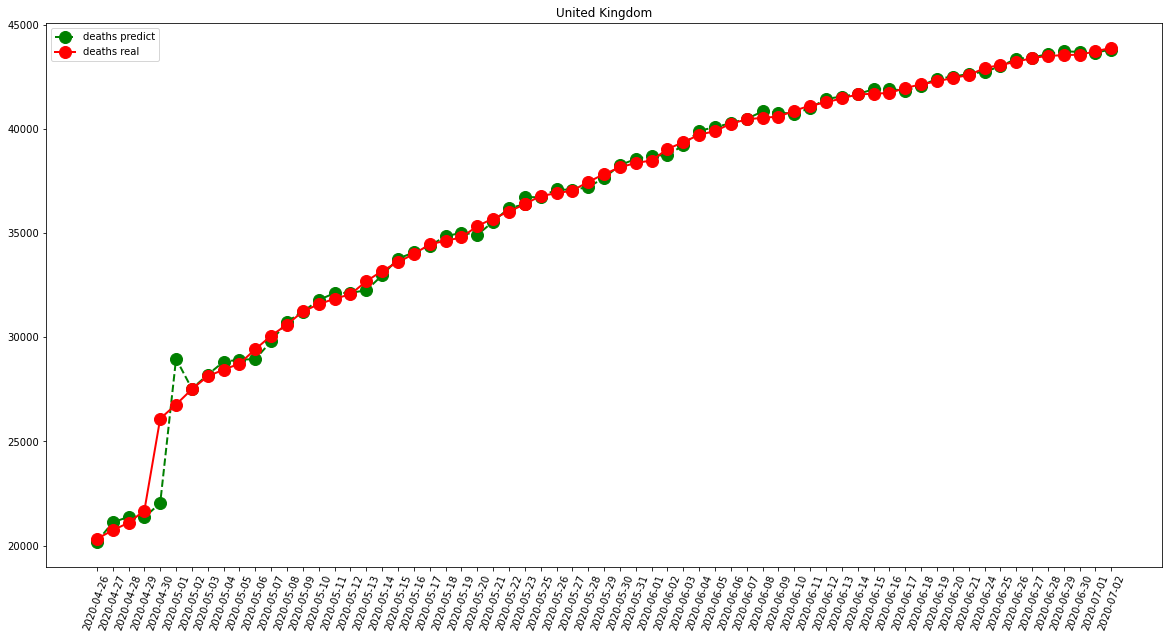

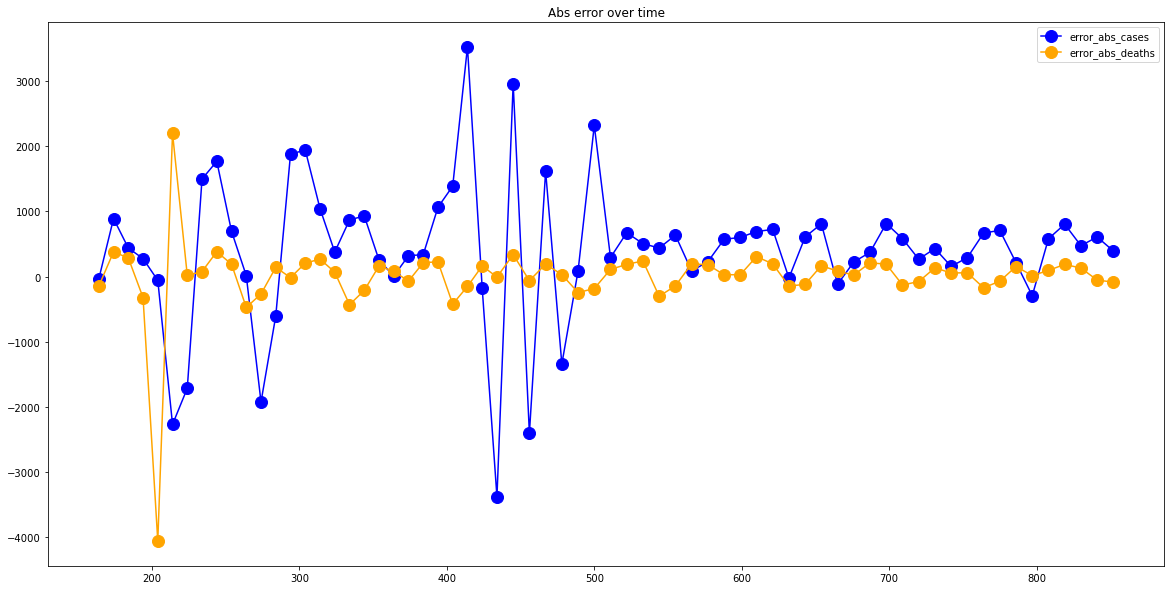

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAPE =  316.7878787878788
RMSE =  449.92635761058415
-- Germany performances for deaths --
MAPE =  33.03030303030303
RMSE =  53.43446850341476


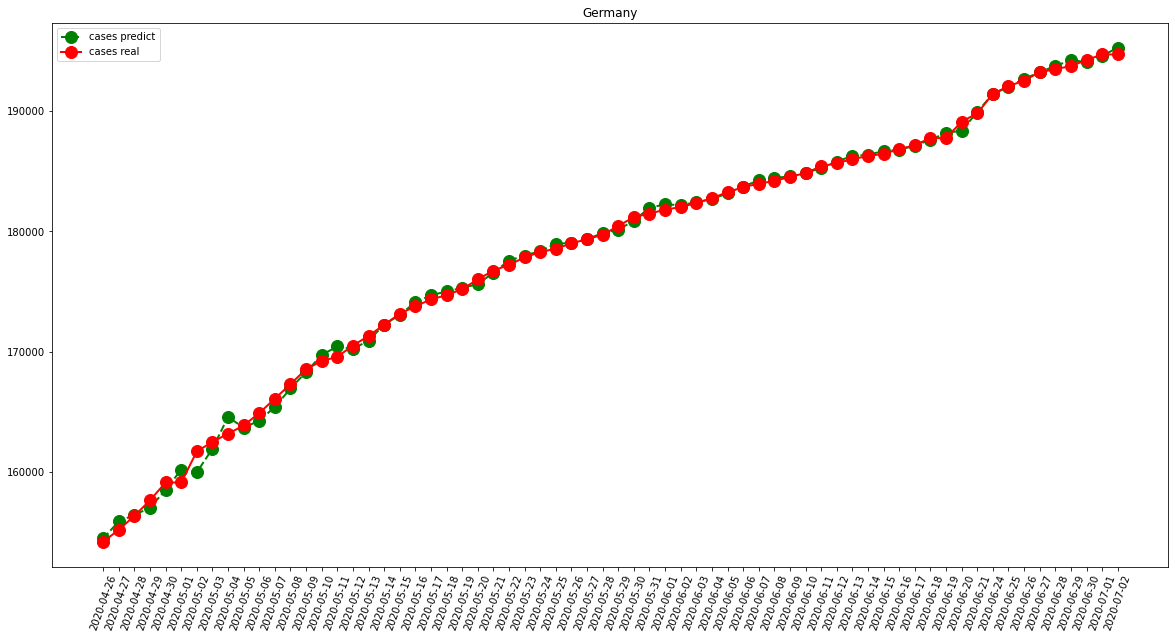

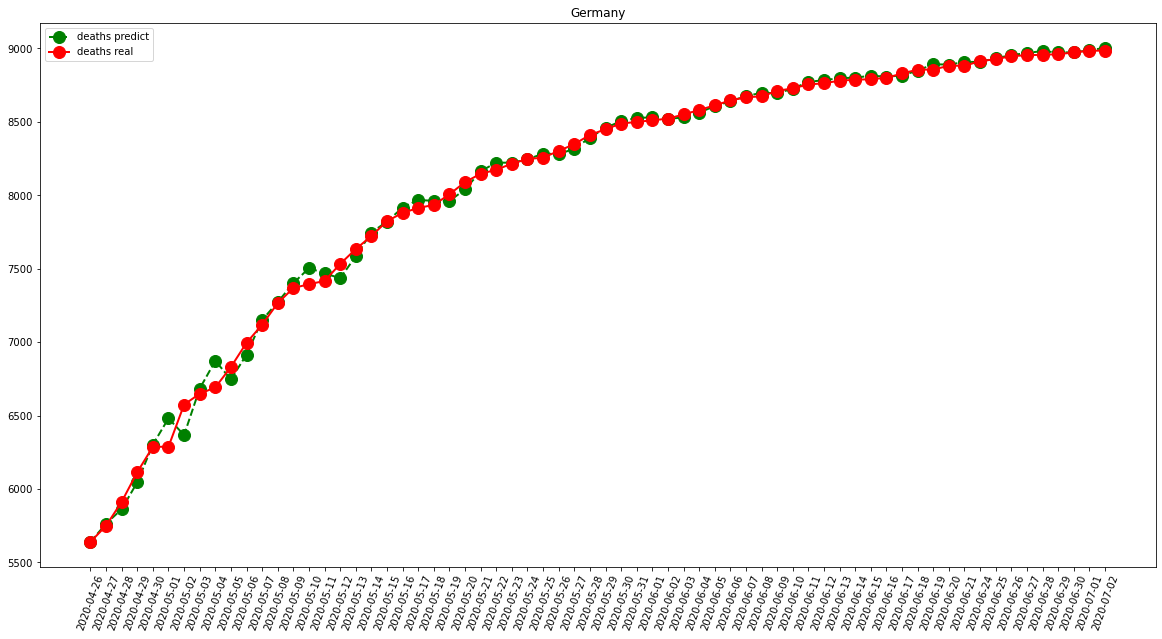

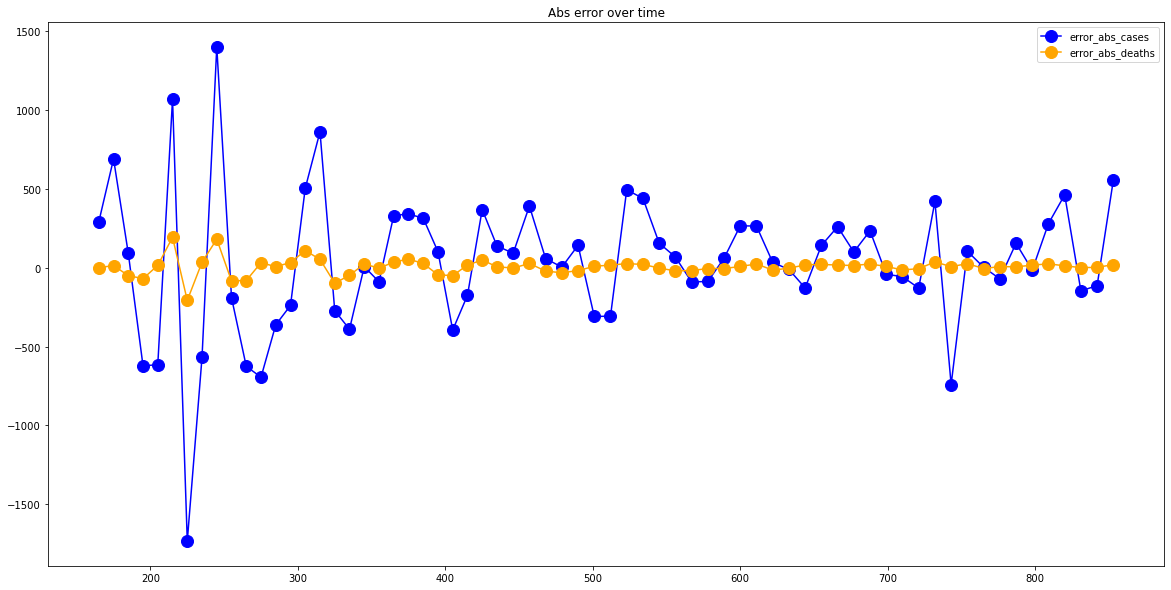

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAPE =  273.5151515151515
RMSE =  351.3827663458305
-- Iran performances for deaths --
MAPE =  17.87878787878788
RMSE =  29.772877630894907


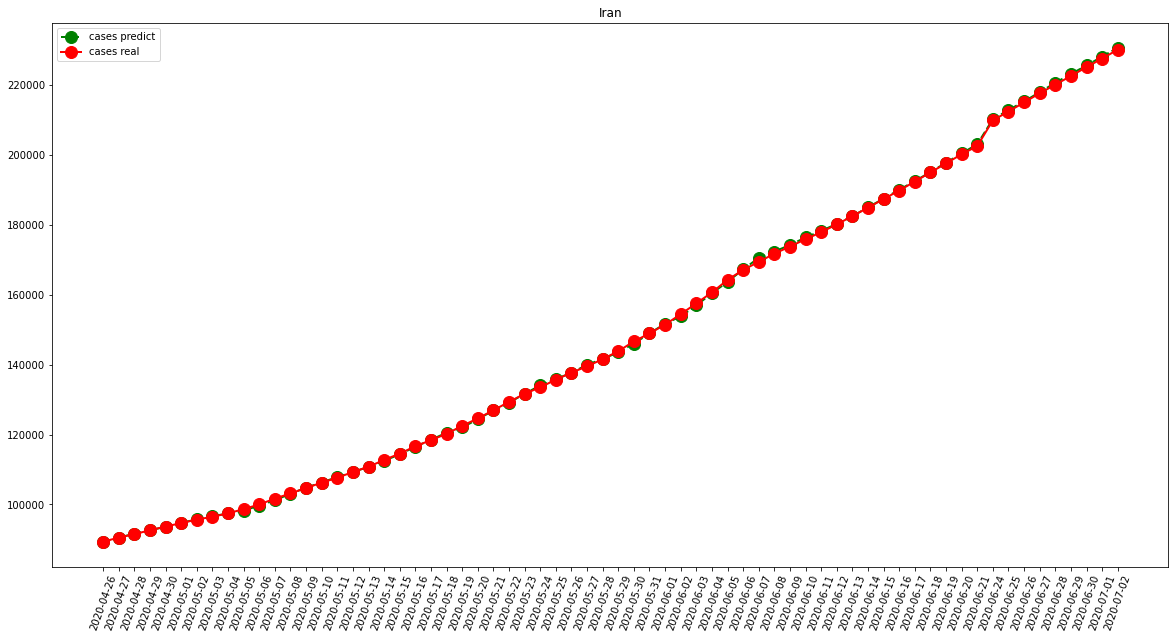

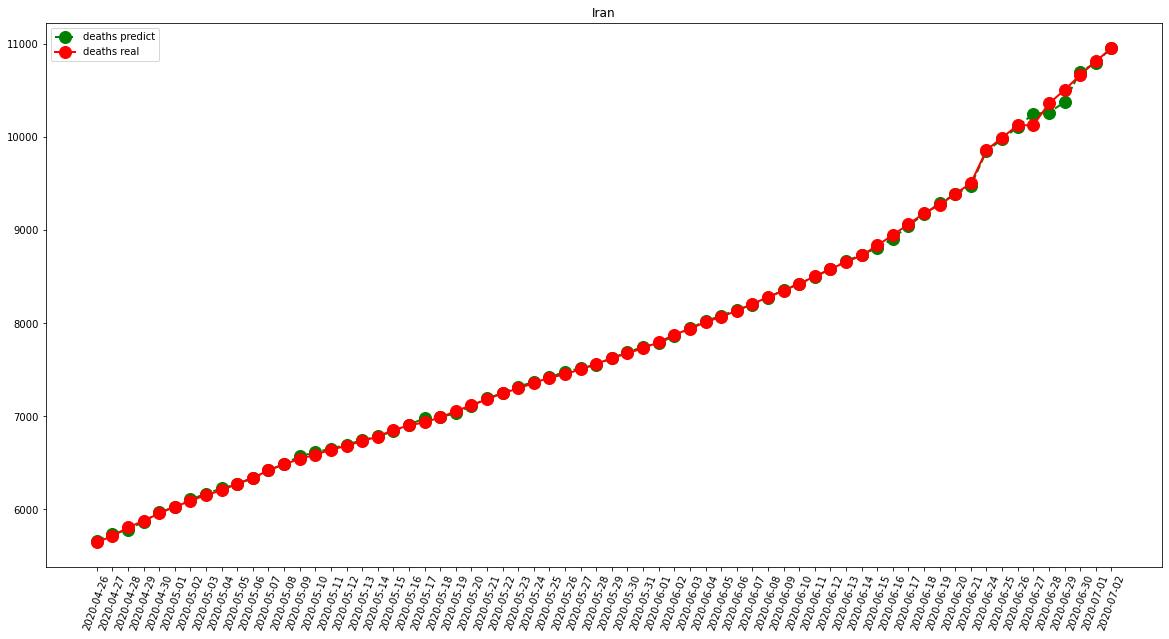

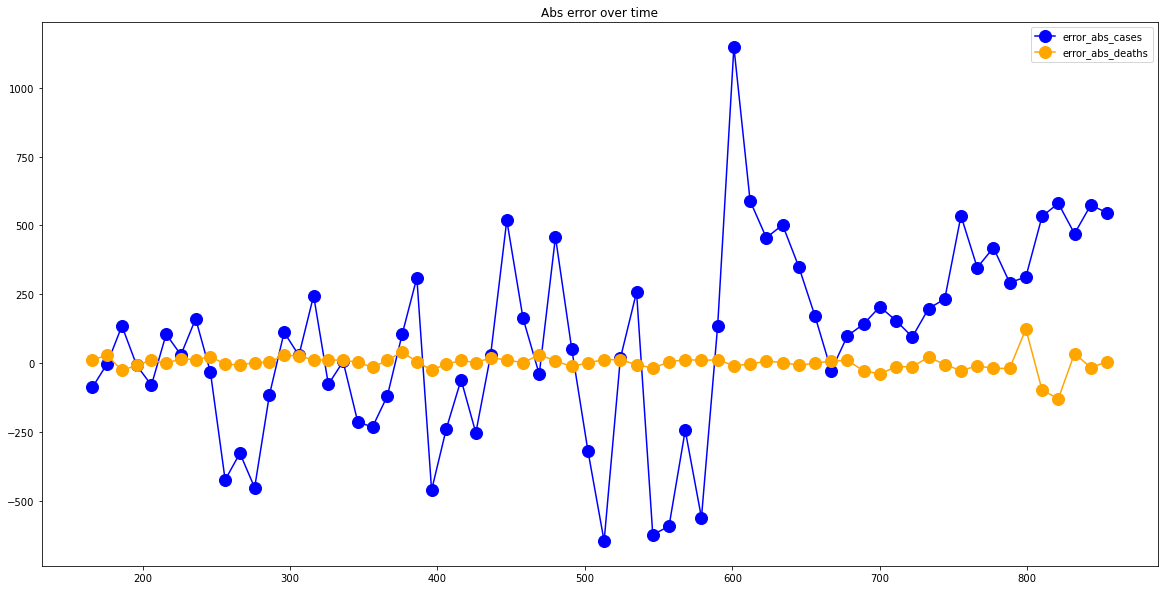

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAPE =  279.72727272727275
RMSE =  422.5147657452071
-- Turkey performances for deaths --
MAPE =  27.681818181818183
RMSE =  124.93822716070773


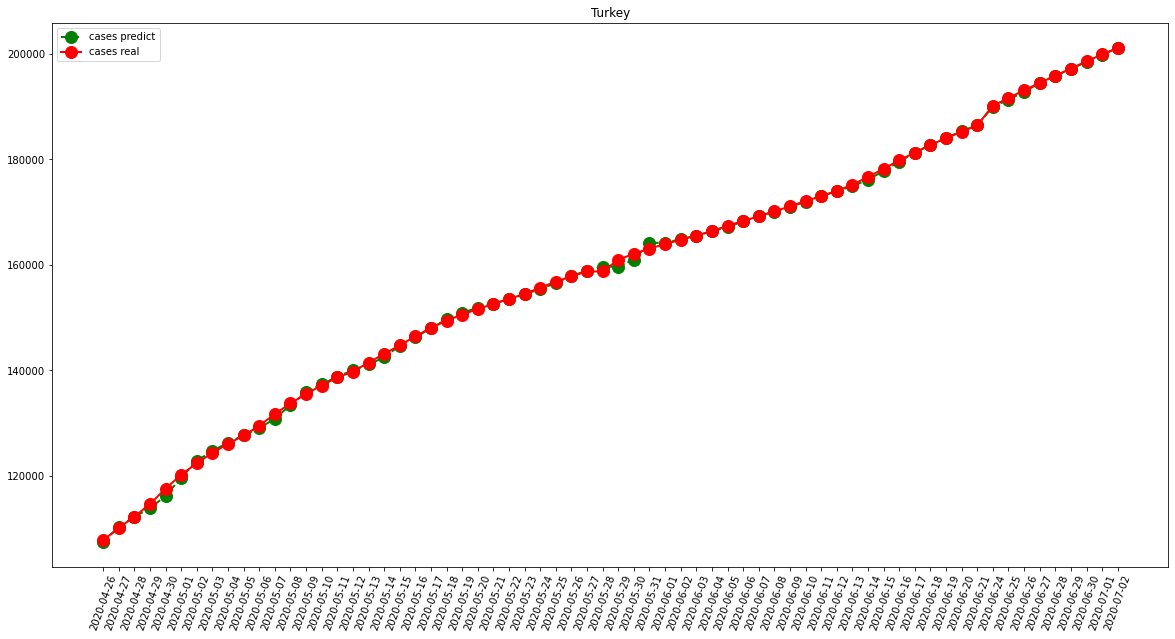

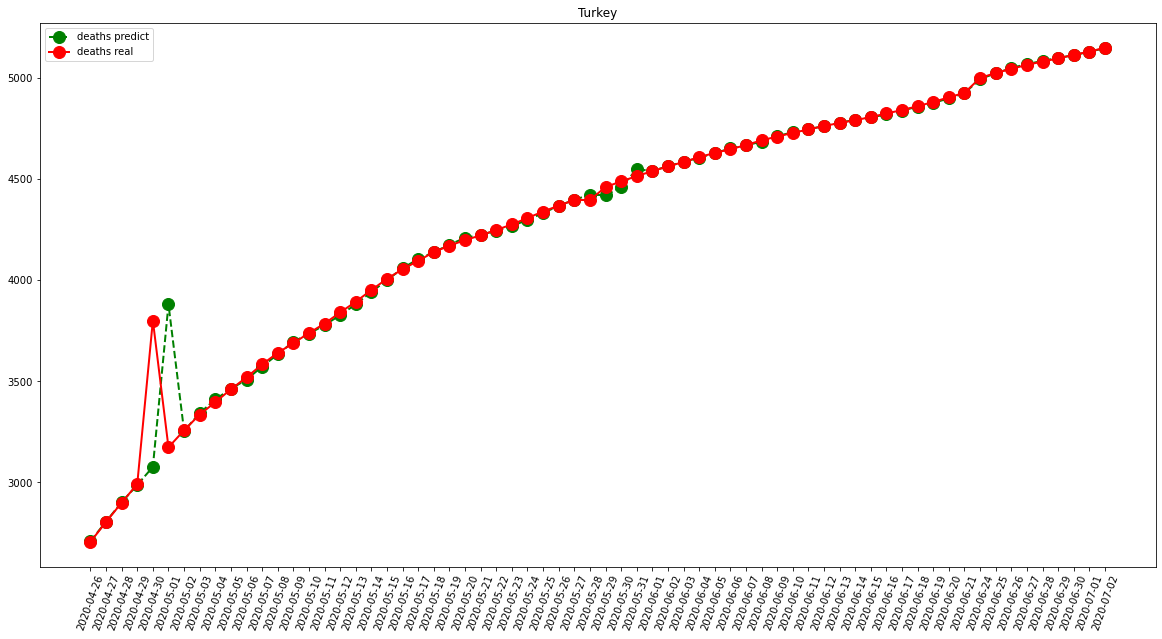

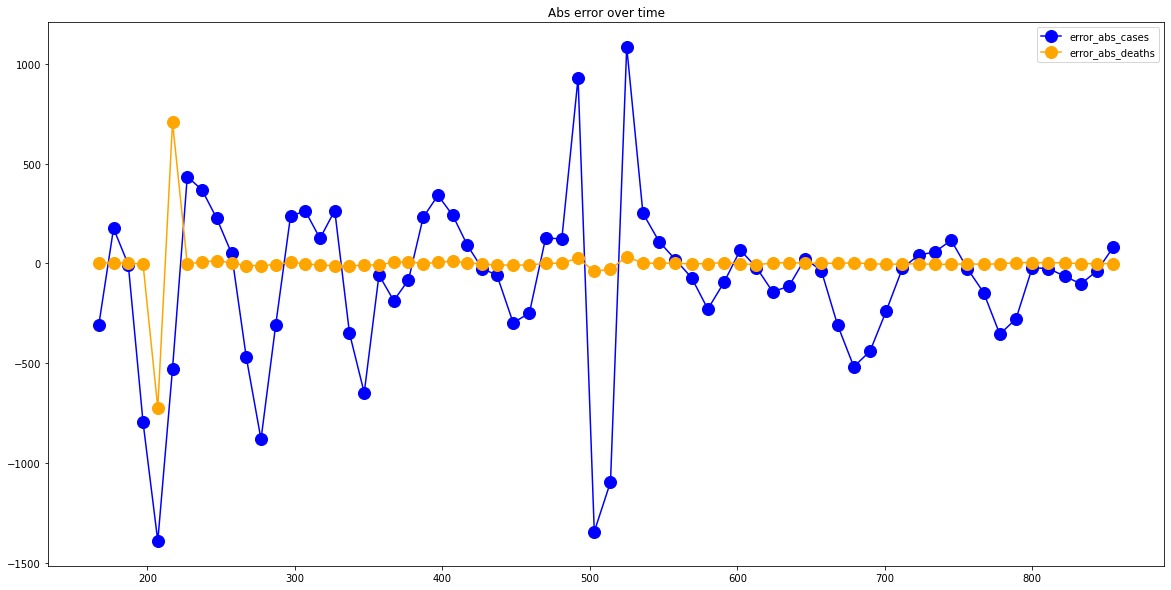

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAPE =  8693.666666666666
RMSE =  11154.24802715459
-- Brazil performances for deaths --
MAPE =  380.15384615384613
RMSE =  469.41551218182286


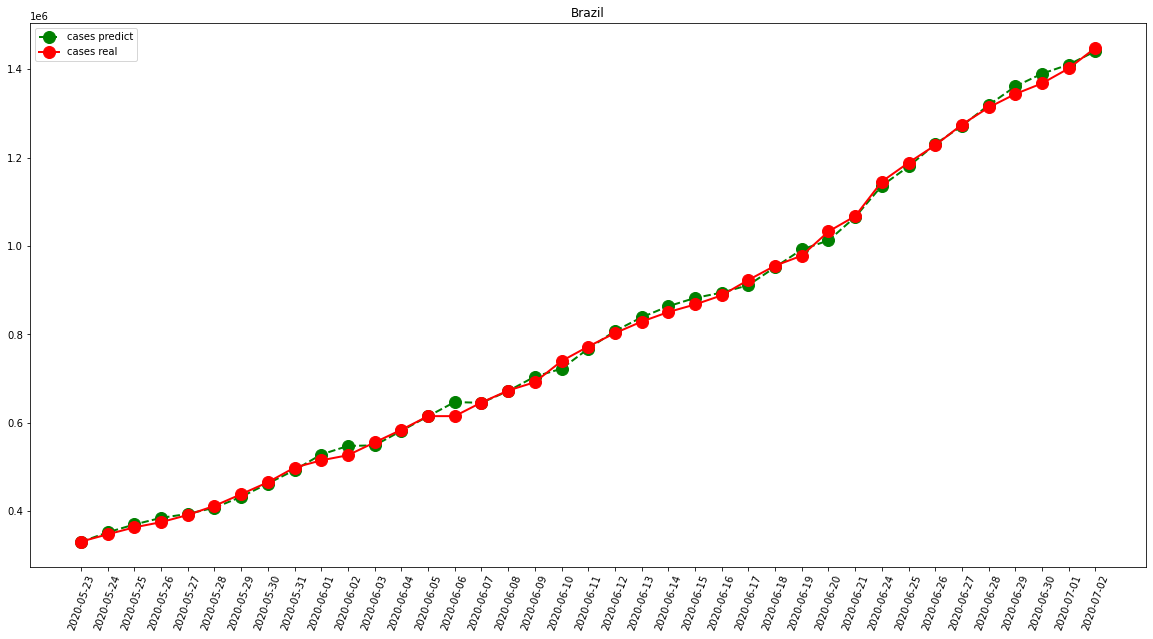

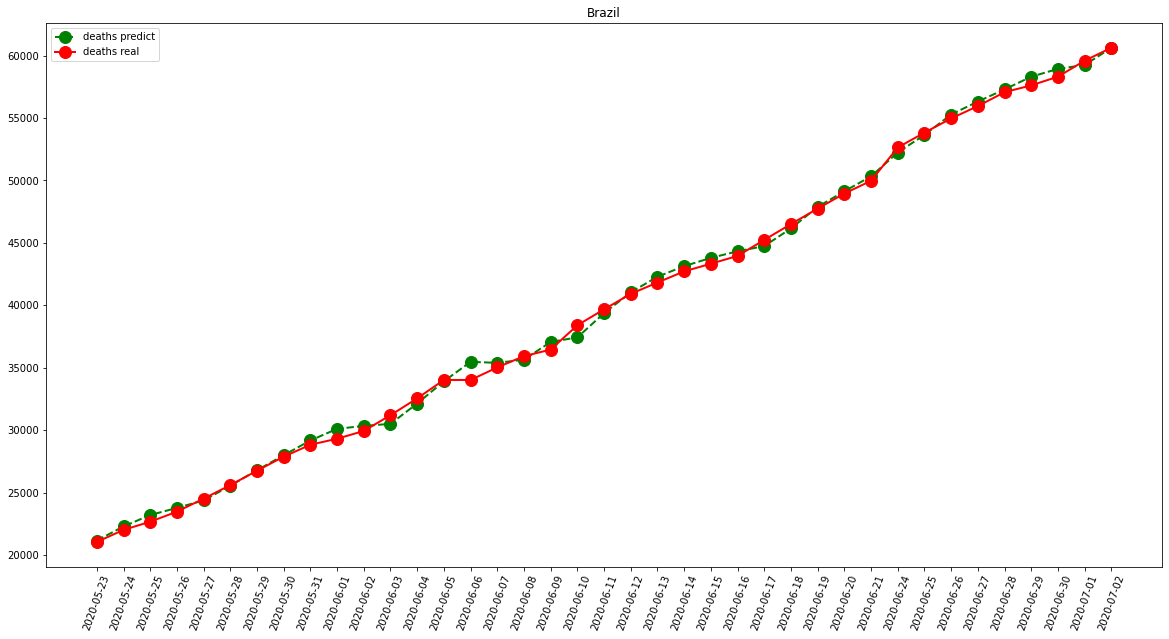

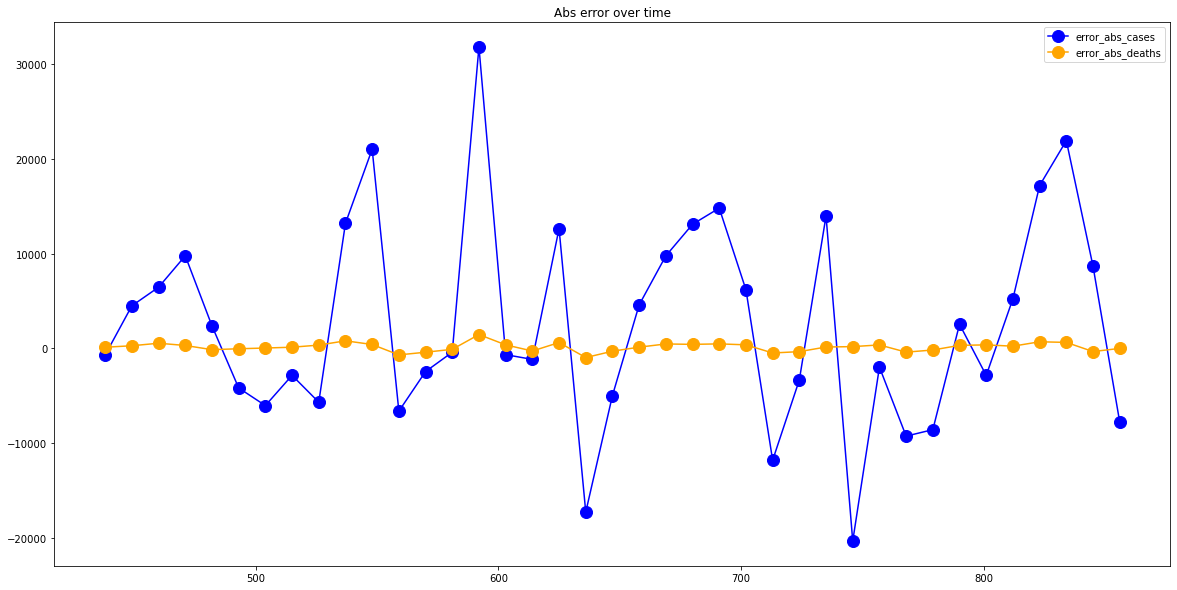

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)